<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

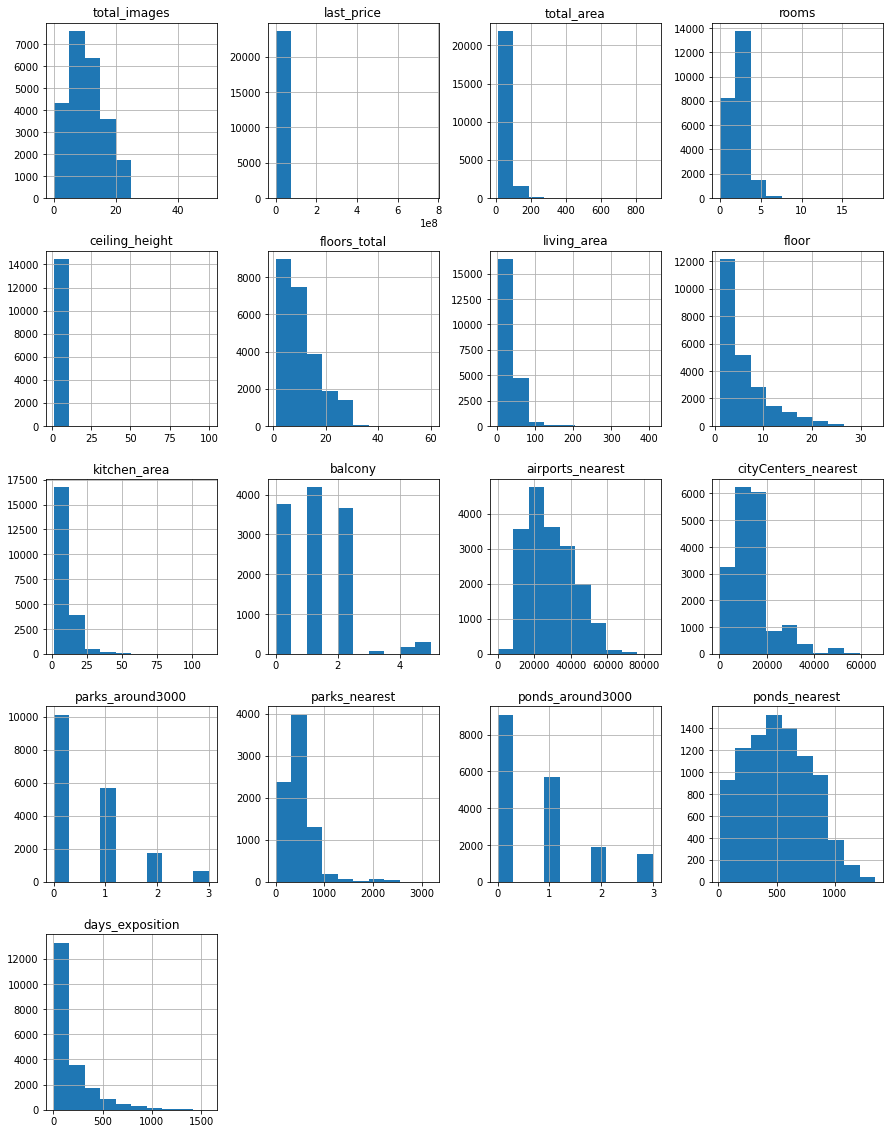

In [5]:
df.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

In [6]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

Изучив общую информацию видно большое количество пропусков над котороми нужно поработать, в столбце **first_day_exposition** не правильно указан тип данных, из-за чего информация выглядит некорректно, так же стоит поменять у некоторых данных тип с **float** на **int**, у большенства графиков огромные хвосты в правую сторону, это говорит о выбросах, которые будут мешать произвести грамотный анализ.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

####  Найдите и изучите пропущенные значения

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#заменим пропуски на 0
def name(column):
    df[column] = df[column].fillna(0)
    
name('balcony')
name('parks_around3000')
name('ponds_around3000')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>days_exposition - если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Убрала days_exposition
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [9]:
#удалим строки с незначительным кол-ом пропусков
df = df.dropna(subset=['floors_total', 'locality_name'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Причины по которым могли остаться пропуски: просто не заполнили те данные о которых не известно, например отсутствует балкон, нет ближайших парков, если квартира-студия то заполнили только общую площадь; не правильно выгрузили данные; из-за человеческого фактора. Пропуски в столбце **is_apartment** могли возникнуть из-за не знания что такое апартаменты.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё заполним пропуски в столбце с высотой потолков, тем более мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Заполнила пропуски медианным значением.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Рассмотрите типы данных

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')        

In [14]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [15]:
def t(column):
    df[column] = df[column].astype('int64')
    
t('last_price')
t('floors_total')
t('balcony')
t('parks_around3000')
t('ponds_around3000')

pd.options.display.float_format = '{: .2f}'.format

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

В столбце **first_day_exposition** хранятся сведения о дате и времени, а в столбце **is_apartment** - булевые значения, поэтому необходимо понять тип на соответствующий для корректной работы. Так же для удобство нужно поменять дробные числа на целые, там где это возможно.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. 

In [17]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
df['locality_name'] = (
    df['locality_name']
    .str.lower()
    .str.replace('посёлок', 'поселок')
    .str.replace('городского типа', '')
    .str.replace('городской', '')
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Найдите и устраните редкие и выбивающиеся значения.

In [19]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,21700.00,23565.00,21343.00,23565.00,18041.00,18064.00,23565.00,8030.00,23565.00,9036.00,20394.00
mean,9.88,6540058.26,60.32,2.07,2.72,10.68,34.45,5.88,10.56,0.59,28797.08,14192.66,0.47,490.58,0.59,518.29,180.74
std,5.68,10910934.72,35.66,1.08,0.99,6.59,22.05,4.87,5.90,0.96,12632.50,8613.35,0.75,341.57,0.88,278.01,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,18565.00,9238.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4646000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26757.00,13096.50,0.00,455.00,0.00,503.00,95.00
75%,14.00,6790000.00,69.70,3.00,2.70,16.00,42.30,8.00,12.00,1.00,37273.00,16285.00,1.00,612.00,1.00,730.00,231.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Рассмотрим выбивающиеся значения в столбце **last_price**. 

Для начала изучим данные по квартире с минимальной стоимостью.

In [20]:
df.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,санкт-петербург,36421.00,9176.00,1,805.00,0,NaN,8.00


Квартира с большой площадью, находится в Санкт-Петербурге, указаны даже расстояния до аэропорта и центра города, парки, все столбцы заполнены коректно. Скорее всего цена указана в тысячах, а не в миллионах. 

Изменим цену в таблице.

In [21]:
df.loc[8793, 'last_price'] = 12190000
df['last_price'].describe()

count        23565.00
mean       6540575.04
std       10910913.92
min         430000.00
25%        3400000.00
50%        4647000.00
75%        6790000.00
max      763000000.00
Name: last_price, dtype: float64

Теперь смущает лишь максимальная цена.

In [22]:
print('Количество квартир со стоимостью больше 100 мл.руб.:', 
      df.query('last_price > 100000000')['last_price'].count()
     )

Количество квартир со стоимостью больше 100 мл.руб.: 37


Аномальных значений не много, можно от них избавиться.

In [23]:
df.drop(index=df.query('last_price > 100000000').index, inplace=True)

Рассмотрим данные по **total_area**. 

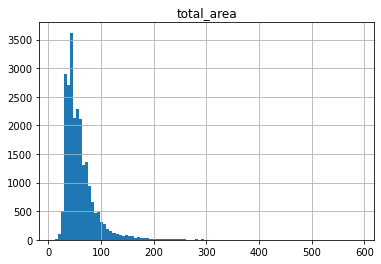

In [24]:
df.hist('total_area', bins=100);

По гистограмме видно, что после 200 следует узинькая полосочка, и тем неменее она виднеется, а вот после ~270 уже мало что заметно.

Посмотрим количество таких квартир.

In [25]:
print('Количество квартир с общей площадью более 270м2:',
      df.query('total_area > 270')['total_area'].count()
     )

Количество квартир с общей площадью более 270м2: 70


Удалим данные по этим квартирам. 

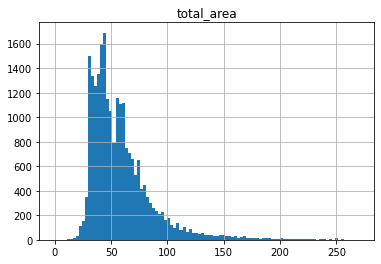

In [26]:
df.drop(index=df.query('total_area > 270').index, inplace=True)
df.hist('total_area',bins=100, range=(0, 270));

Рассмотрим данные по **rooms**.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

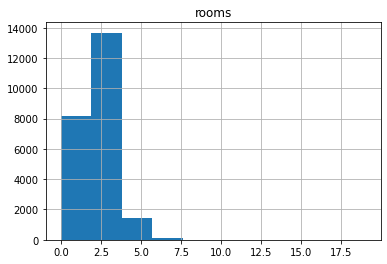

In [27]:
df.hist('rooms', range=(0,19))

In [28]:
print('Количество квартир с числом комнат больше 7:',
      df.query('rooms > 7')['rooms'].count()
     )

Количество квартир с числом комнат больше 7: 15


In [29]:
df.drop(index=df.query('rooms > 7').index, inplace=True)

Рассмотрим данные по **ceiling_height**.

In [30]:
df.drop(index=df.query('4 < ceiling_height < 25').index, inplace=True)
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 36)]['ceiling_height']/10)
df.drop(index=df.query('ceiling_height < 2.5 or ceiling_height > 36').index, inplace=True)

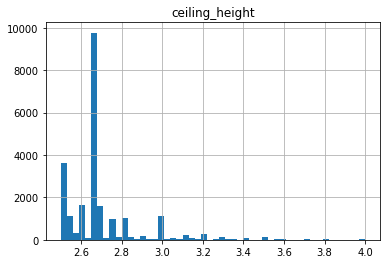

In [31]:
df.hist('ceiling_height', bins=50);

Рассмотрим данные по **floors_total**

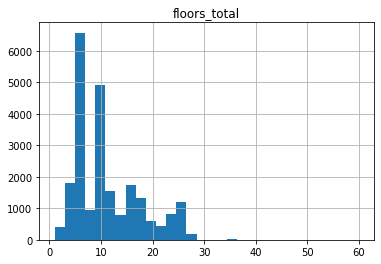

In [32]:
df.hist('floors_total', bins=30);

In [33]:
print('Количество этажей больше 30:', 
      df.query('floors_total > 30')['floors_total'].count()
     )

Количество этажей больше 30: 31


In [34]:
df.drop(index=df.query('floors_total > 30').index, inplace=True)

Рассмотрим данные по **living_area**.

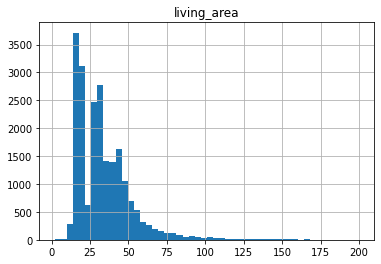

In [35]:
df.hist('living_area', bins=50);

In [36]:
print('Количество квартир с жилой площадью меньше 10:',
      df.query('living_area < 10')['living_area'].count()
     )
print('Количество квартир, где жилая площадь больше общей:',
     df.query('living_area > total_area')['living_area'].count()
     )
print('Количество квартир с жилой площадью больше 150:',
      df.query('living_area > 150')['living_area'].count()
     )

Количество квартир с жилой площадью меньше 10: 25
Количество квартир, где жилая площадь больше общей: 0
Количество квартир с жилой площадью больше 150: 44


In [37]:
df.drop(index=df.query('living_area < 10 or living_area > 150').index, inplace=True)

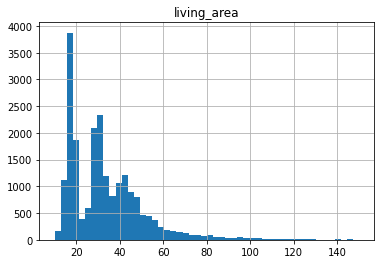

In [38]:
df.hist('living_area', bins=50);

Рассмотрим данные по **kitchen_area**.

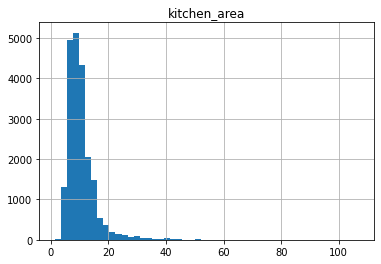

In [39]:
df.hist('kitchen_area', bins=50);

In [40]:
print('Количество квартир с площадью кухни меньше 4:',
      df.query('kitchen_area < 4')['kitchen_area'].count()
     )
print('Количество квартир, где площадь кухни больше общей:',
     df.query('kitchen_area > total_area')['kitchen_area'].count()
     )
print('Количество квартир с площадью кухни больше 50:',
      df.query('kitchen_area > 50')['kitchen_area'].count()
     )

Количество квартир с площадью кухни меньше 4: 27
Количество квартир, где площадь кухни больше общей: 0
Количество квартир с площадью кухни больше 50: 30


In [41]:
df.drop(index=df.query('kitchen_area < 4 or kitchen_area > 50').index, inplace=True)

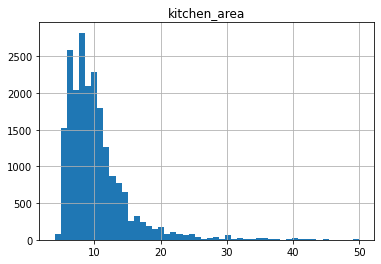

In [42]:
df.hist('kitchen_area', bins=50, range=(4, 50));

Проверим есть ли аномалии в столце **floor**. 

Правильно ли указаны этажи, этаж расположения квартиры не должен превышать общее число этажей.

Количество аномалий: 0


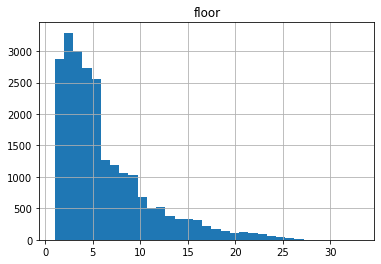

In [43]:
print('Количество аномалий:', 
      df.query('floor > floors_total')['floor'].count()
     )
df.hist('floor', bins=33, range=(1, 33));

Рассмотрим данные из столбца **days_exposition**.

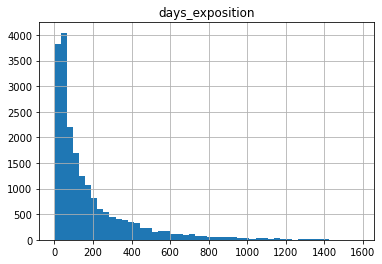

In [44]:
df.hist('days_exposition', bins=50);

In [45]:
print('Количество квартир, которые продавались более 3 лет:', 
      df.query('days_exposition > 365*3')['days_exposition'].count()
     )

Количество квартир, которые продавались более 3 лет: 162


In [46]:
df.drop(index=df.query('days_exposition > 365*3').index, inplace=True)

- По всем изученным данным наблюдаются большие выбросы, от которых следовало избавиться для более корректного анализа. 
- Исходя из логических предположений удалось скорректировать данные о цене квартиры и высоту потолков. 
- Минимальная цена квартиры 430000 р., что довольно мало, но можно предположить что это квартиры в небольших населенных пунктах. 
- Больше всего квартир расположено с 1 по 5 этажи.
- Судя по графику больнинство квартир продаются за пол года.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Здесь хорошо бы посмотреть на количество удалённых данных
	
	new_data.shape[0] / old_data.shape[0]
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим цену за квадратный метр.

In [47]:
df['price_of_m2'] = df['last_price'] / df['total_area']

Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [48]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday

Добавим месяц и год публикации объявления.

In [49]:
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим тип этажа квартиры.

In [50]:
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)

Добавим расстояние до центра города в километрах. 

In [51]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,day_of_week,month,year,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.00,6800.00,2,84.00,3,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,100000.00,1,6,2018,другой,8.00


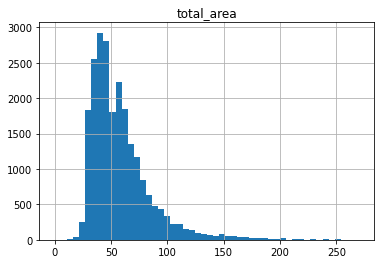

In [53]:
df.hist('total_area', bins=50, range=(0, 270));

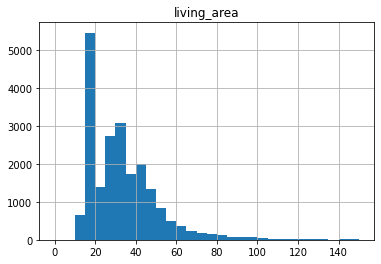

In [54]:
df.hist('living_area', bins=30, range=(0, 150));

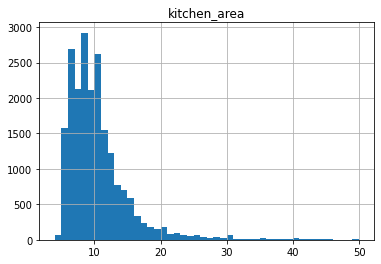

In [55]:
df.hist('kitchen_area', bins=46, range=(4, 50));

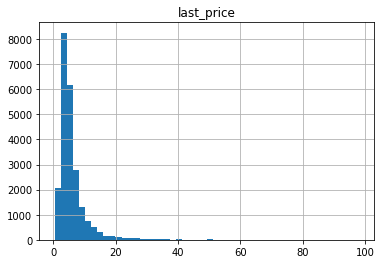

In [56]:
df.update(df['last_price']/1000000)
df.hist('last_price', bins=50);

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

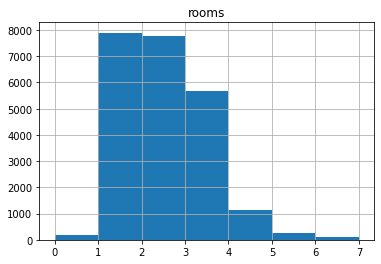

In [57]:
df.hist('rooms', bins=7, range=(0, 7));

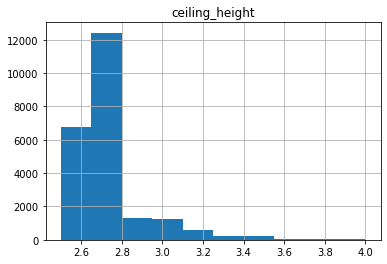

In [58]:
df.hist('ceiling_height', range=(2.50, 4));

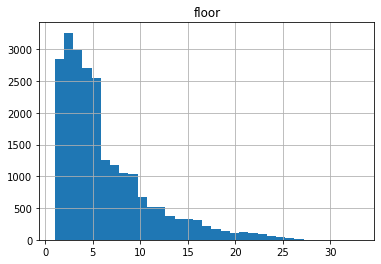

In [59]:
df.hist('floor', bins=33, range=(1, 33));

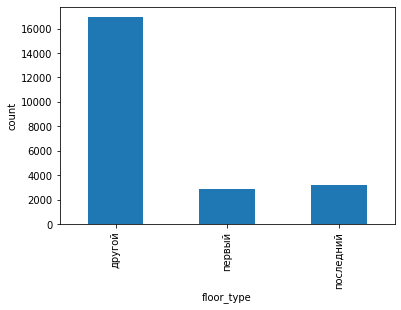

In [60]:
df.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count');

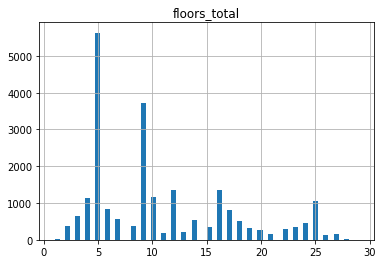

In [61]:
df.hist('floors_total', bins=60);

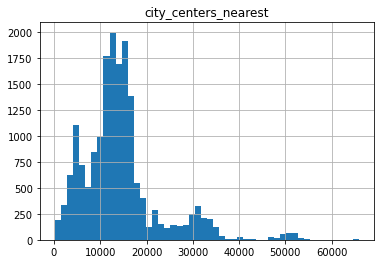

In [62]:
df.hist('city_centers_nearest', bins=50);

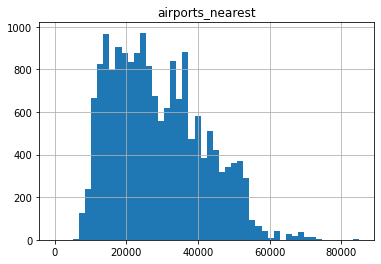

In [63]:
df.hist('airports_nearest', bins=50);

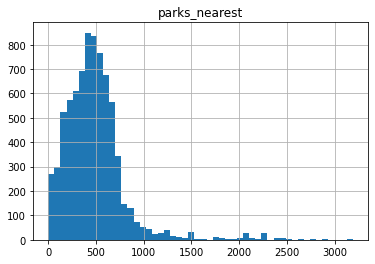

In [64]:
df.hist('parks_nearest', bins=50);

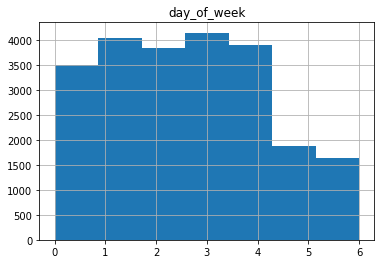

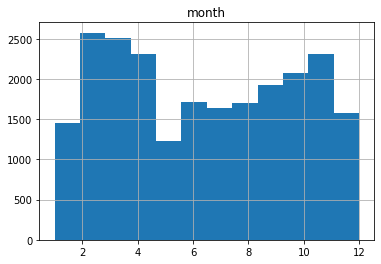

In [65]:
df.hist('day_of_week', bins=7, range=(0, 6));
df.hist('month', bins=12, range=(1,12));

Большая часть квартир имеет:
- общую площадь от 30 до 50 кв.м
- жилую площадь от 15 до 20 кв.м сдесь наблюдается скачок, и от 25 до 35 кв.м
- площадь кухни от 6 до 12 кв.м
- количестов комнат 2 и 3
- высоту потолков от 2,5 до 2,8 м
- расположены с 1 по 5 этажи, если смотреть общее количество и тип этажа то больше квартир расположенно на других этажах, то есть не первый и не последний, что вполне логично

Цена квартир в большенстве своем находится в одном диапозоне, так же есть довольно дорогие квартиры, но их не так много. Большая цена может зависить от площади квартиры, района в котором расположена.

По графику с общим количеством этажей видно что больше всего домов с 5, 9, 16 и 25 этажами.

Большенство квартир расположено в радиусе 10-18 км от центра и 10-38 км от аэропорта.

Парки расположены в радиусе до 800 метров, довольно близко.

В будние дни объявления публикуют чаще чем в выходные, это может быть связано например с работой риелторов. 

В январе не так много объявление, возможно это связано сновогодними праздниками, многие хотят провести их в спокойной обстановке без лишних переживаний. А вот с февраля уже прослеживается резкий скачок в публикациях, и в мае опять спад. Можно предположить, что мае начинается садоводческий сезон и у людей хватает забот, а так же много праздничных дней. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Изучите, как быстро продавались квартиры

Среднее количество дней: 171
Медианное количество дней: 93


count    19910.00
mean       171.25
std        197.38
min          1.00
25%         44.00
50%         93.00
75%        224.00
max       1095.00
Name: days_exposition, dtype: float64

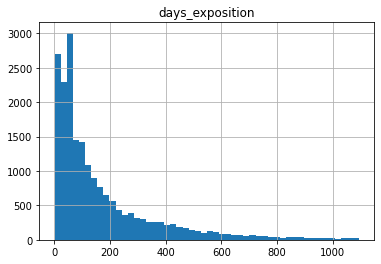

In [66]:
df1 = df[df['days_exposition'] != 0]
df1.hist('days_exposition', bins=50);
print('Среднее количество дней:', 
     int(df1['days_exposition'].mean()))
print('Медианное количество дней:',
     int(df1['days_exposition'].median()))
df1['days_exposition'].describe()

Для более корректного иследования исключили нулевые значения. Исходя из результатов медианы, обычно продажи занимают 93 дня. Продажи менее 44 дней можно считать быстрыми, а более 224 дней - необычно долгими.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

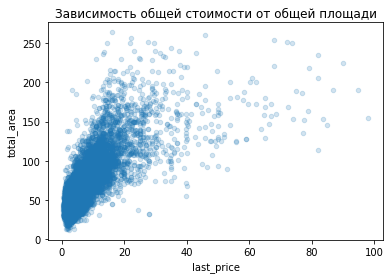

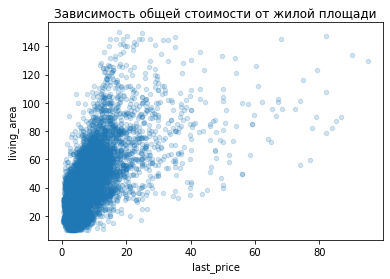

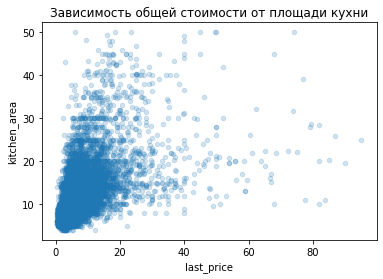

In [67]:
df.plot(title='Зависимость общей стоимости от общей площади', x='last_price', y='total_area', kind='scatter', alpha=0.2);
df.plot(title='Зависимость общей стоимости от жилой площади',x='last_price', y='living_area', kind='scatter', alpha=0.2);
df.plot(title='Зависимость общей стоимости от площади кухни',x='last_price', y='kitchen_area', kind='scatter', alpha=0.2);

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё добавим расчет корреляции для общей цены, общей площади, жилой площади, площади кухни и количества комнат используя .corr()
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Коэффициент Пирсона расчитала, в выводе добавила строчку о нём. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

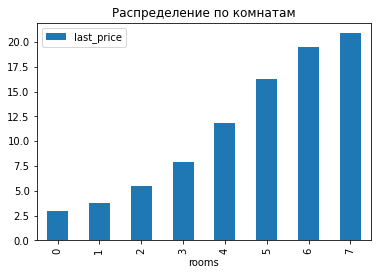

In [68]:
df.pivot_table(index='rooms', values='last_price').plot(y='last_price', title='Распределение по комнатам', kind='bar');

In [69]:
print('Расчет корреляции для общей цены и общей площади:', df['last_price'].corr(df['total_area']))
print('Расчет корреляции для общей цены и жилой площади:', df['last_price'].corr(df['living_area']))
print('Расчет корреляции для общей цены и площади кухни:', df['last_price'].corr(df['kitchen_area']))
print('Расчет корреляции для общей цены и количества комнат:', df['last_price'].corr(df['rooms']))

Расчет корреляции для общей цены и общей площади: 0.7398075054748847
Расчет корреляции для общей цены и жилой площади: 0.6376161416270558
Расчет корреляции для общей цены и площади кухни: 0.5561005157377137
Расчет корреляции для общей цены и количества комнат: 0.44490772727824135


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Тут можно построить компактную табличку выбрав все необходимые столбцы и применив к ним corr()

	df[['last_price', 'total_area', 'rooms', '...']].corr()
</div>

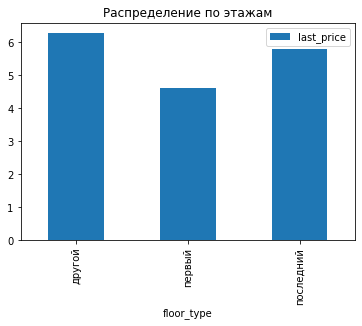

In [70]:
df.pivot_table(index='floor_type',  values='last_price').plot(y='last_price', title='Распределение по этажам', kind='bar');

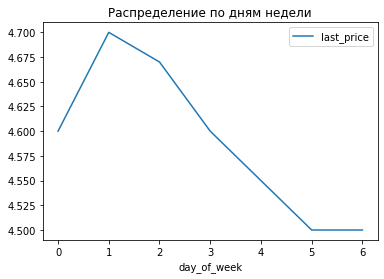

In [71]:
df.pivot_table(index='day_of_week',  values='last_price', aggfunc='median').plot(y='last_price', 
                                                               title='Распределение по дням недели', kind='line');

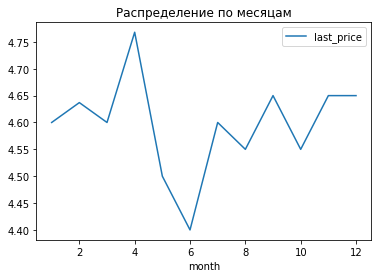

In [72]:
df.pivot_table(index='month',  values='last_price', aggfunc='median').plot(y='last_price', 
                                                               title='Распределение по месяцам', kind='line');

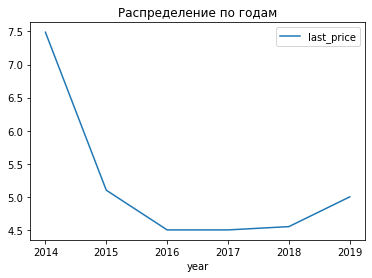

In [73]:
df.pivot_table(index='year',  values='last_price', aggfunc='median').plot(y='last_price', 
                                                               title='Распределение по годам', kind='line');

По графику очень четко прослеживается зависимость цены от количества комнат, чем больше комнат тем больше цена.

Можно тоже самое сказать и про площадь, с увеличение цены график рассеивания растет вверх, тоесть к большей площади.

По коэффициенту корреляции Пирсона, расчитанных для общей цены, общей площади, жилой площади, площади кухни и количества комнат, видно что больше всего рост цены зависит от общей площади.

Так же цена зависит от этажа, на первом этаже цена меньше чем на других. Люди с меньшей вероятностью покупают квартиры на первом этаже, возможно из за того что с улицы в окнах всё видно, а все мы довольно скрытные и не хотим чтобы посторонние взгляды вторгались в наше личное пространство. Так же может быть по каким то комунальным причинам, например: подвальный запах, угроза затопления, так же запахи с улицы, постоянные звуки из подъезда, потому что все через нее проходят.

В начале недели цена подскакивает и с каждым днем к выходным она снижается, можно сказать что зависимость от дня недели тоже есть. А вот с месяцами всё довольно сумбурно в апреле цена взлетает и к июню падает, к осени снова начинает рости. Если вспомнить график по кооличеству продаж по месяцам, то там мы видели что количество объявлений к лету становилось меньше, а к осени увеличиволось, из-за этого сдесь и цена скачет так же, мы же смотрим по медиане.

Из-за кризиза в 2014 году цена на недвижимость сильно упала, это отбражено и на нашем графике. И продолжала падать до 2016. С 2018 года цена вновь начала подниматься. Проверим связвно ли это как то с параметрами квартир.

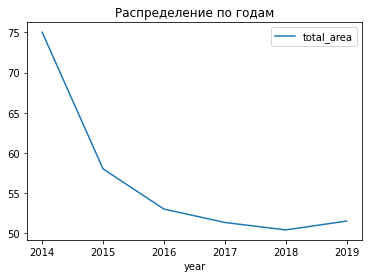

In [74]:
df.pivot_table(index='year',  values='total_area', aggfunc='median').plot(y='total_area', 
                                                               title='Распределение по годам', kind='line');

На графике изображено, что с 2015 по 2019 стали чаще покупать квартиры с меньшей площадью. Отсюда и спад, т.к. цена зависит от площади. А вот от года продажи скорее всего цена зависит в определенные моменты, по каким то глобальным причинам.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

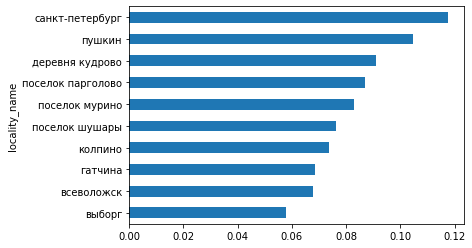

In [75]:
top_10 = df.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh');

По графику видно, что самая высокая средняя цена одного кв.м в Санкт-Петербурге и в ближайших пригородах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👏🏻👏🏻👏🏻 Отличная визуализация! Не забывай писать вывод после раздела
</div>

#### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.

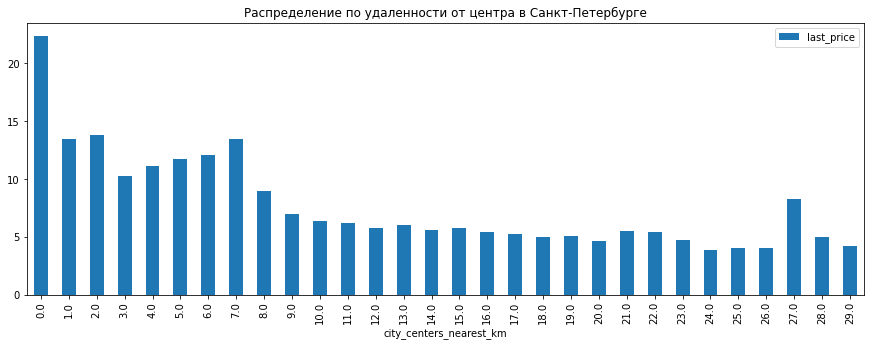

In [76]:
df[df['locality_name'] == 'санкт-петербург'].pivot_table(
    index='city_centers_nearest_km',
    values='last_price',
    aggfunc='mean').plot(kind='bar', title='Распределение по удаленности от центра в Санкт-Петербурге', figsize=(15, 5));

In [77]:
df3_7 = df.query('3 <= city_centers_nearest_km <= 7 and locality_name == "санкт-петербург"')
df3_7 = df3_7.pivot_table(index='city_centers_nearest_km', columns='floor_type', values='last_price', aggfunc='count')
df3_7.columns=['другой', 'первый', 'последний']
#посчитаем отношение колличества квартир на первом этаже к остальным
df3_7['отношение'] = df3_7['первый'] / (df3_7['другой'] + df3_7['последний'])
df3_7

,другой,первый,последний,отношение
city_centers_nearest_km,,,,
3.00,201,52,75,0.19
4.00,467,76,105,0.13
5.00,639,76,128,0.10
6.00,427,64,80,0.13
7.00,317,32,58,0.09


Из предыдущих исследований помним, что квартиры на первом этаже дешевле чем квартиры на остальных этажах. Исходя из этого посчитав отношение количества квартир на первом этаже к остальным, видно что на 3 км это отношение больше чем на последующих. Следовательно можно сделать вывод что спад на 3 км вызван меньшим количеством дорогих квартир в отношении к дешевым. На 7 км обратная ситуация. Этим и обусловлены выбросы на 3 и на 7 км.

In [78]:
df27 = df.query('city_centers_nearest_km == 27 and locality_name == "санкт-петербург"')
df27.pivot_table(index='total_area', values='last_price', aggfunc='mean')

,last_price
total_area,
32.00,2.25
74.00,14.35


На 27 км продается всего 2 квартиры, цена у которых сильно друг от друга отличается, чем и вызван выброс.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

Нам были предоставлены сведения о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задачей исследования было изучить эти данные, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Для начала была произведена предобработка данных: 
* устранили пропуски ,там где это представлялось возможным; 
* изменили тип данных в некоторых столбцах; 
* устранили дубликаты в названиях населенных пунктов; 
* нашли и устранили редкие и выбивающиеся значения.

Добавили столбцы с данными, которые в последующих действиях упростили работу.

Затем, после всех совершенных действий, которые позволяют более точно и коректно оценивать данные, произвели анализ по которому можно сделать следущие выводы:
- Самая высокая цена на квартиры в Санкт-Петербурге и ближайших пригородах;
- В радиусе 7 км от центра Питера квартиры дороже, чем дальше по удаленности тем цены меньше;
- Больше всего застроено 5 и 9 этажными домами;
- Цена растет с увелечинем комнат, но разница между 1- и 2-комнатными квартирами не так велика, как и между 6- и 7-комнатными;
- Цена квартиры больше всего зависит от общей площади;
- На первом этаже цена меньше чем на других этажах;
- В выходные дни публикуют гораздо меньше объявлений;
- В мае и январе публикаций меньше из-за большого колличества праздничных дней, которые являются выходными.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай немного увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Супер! Так гораздо лучше)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- не заполнять пропуски в столбце days_exposition
<br>- заполнить пропуски в столбце ceiling_height
<br>- добавить расчет корреляции
<br>- дописать общий вывод
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод